In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns
sns.set()
%matplotlib inline

# Things to look out during the Investigation

1. What are the Popular Genres From Year to Year
2. What are the properties associated with High Revenue Movies?
3. Which Actor is Most Present in the top 10 movies?
4. Which Director is Most Present in the top 10 movies?
5. What is the Yearly Revenue Change

In [2]:
# load tmdb-movies csv into a dataframe
movies_df = pd.read_csv('tmdb-movies.csv')

## Initial Exploration of Data
> Explore the data and have a summary of the various details about the dataset

In [3]:
movies_df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
movies_df.shape

(10866, 21)

In [5]:
movies_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [7]:
movies_df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [8]:
# check for duplicates
movies_df.duplicated().sum()

1

In [9]:
# remove duplicated
movies_df.drop_duplicates(inplace=True)

In [10]:
# check number of duplicates again
movies_df.duplicated().sum()

0

In [11]:
# check shape of the dataframe again
movies_df.shape

(10865, 21)

In [12]:
# drop imdb_id, homepage, tagline and overview columns. 
movies_df.drop(['imdb_id', 'homepage','tagline', 'overview'], axis=1, inplace=True )
movies_df.shape

(10865, 17)

In [13]:
# remove rows if the budget or revenue or budget_adj or revenue_adj is 0.0
zero_columns = ['budget', 'revenue', 'budget_adj', 'revenue_adj']
movies_df = movies_df.loc[(movies_df.budget * movies_df.revenue * movies_df.budget_adj* movies_df.revenue_adj) != 0]
movies_df.shape

(3854, 17)

In [14]:
# fill the missing values in the following columns with the values indicated
# cast = 'no_cast'
# director = 'no_director'
# keywords = 'no_keywords'
# genres = 'no_genres'
# production_companies = 'no_production_companies'

columns_to_fillna = ['cast', 'director', 'keywords', 'genres', 'production_companies']
for column in columns_to_fillna:
    movies_df[column] = movies_df[column].fillna('no_'+column)

# check the number of null values again
movies_df.isnull().sum()

id                      0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
keywords                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

## Helper Functions To Be Used in The Analysis

In [15]:
# Used to generates the bar graphs based on the given inputs
def generate_plot(x_val, y_val, fig_size, title, x_label, y_label):
    plt.subplots(figsize=fig_size)
    sns.barplot(x_val, y_val)
    plt.title(title, fontsize=30)
    plt.xlabel(x_label, fontsize=20)
    plt.ylabel(y_label, fontsize=20);

In [16]:
def generate_value_and_count(data):
    """
    This functions takes a column and separates the pipe-separated values and return a dict
    the value and the number of times it occurs
    """    
    val_list = [val.split('|') for val in data]
    
    top_val_list = []
    for new_val in val_list:
        for single in new_val:
            top_val_list.append(single)

    # get the value and count of each item in the top_val_list
    val_and_count = dict()
    for i in top_val_list:
        val_and_count[i] = val_and_count.get(i, 0)+1
    
    return val_and_count

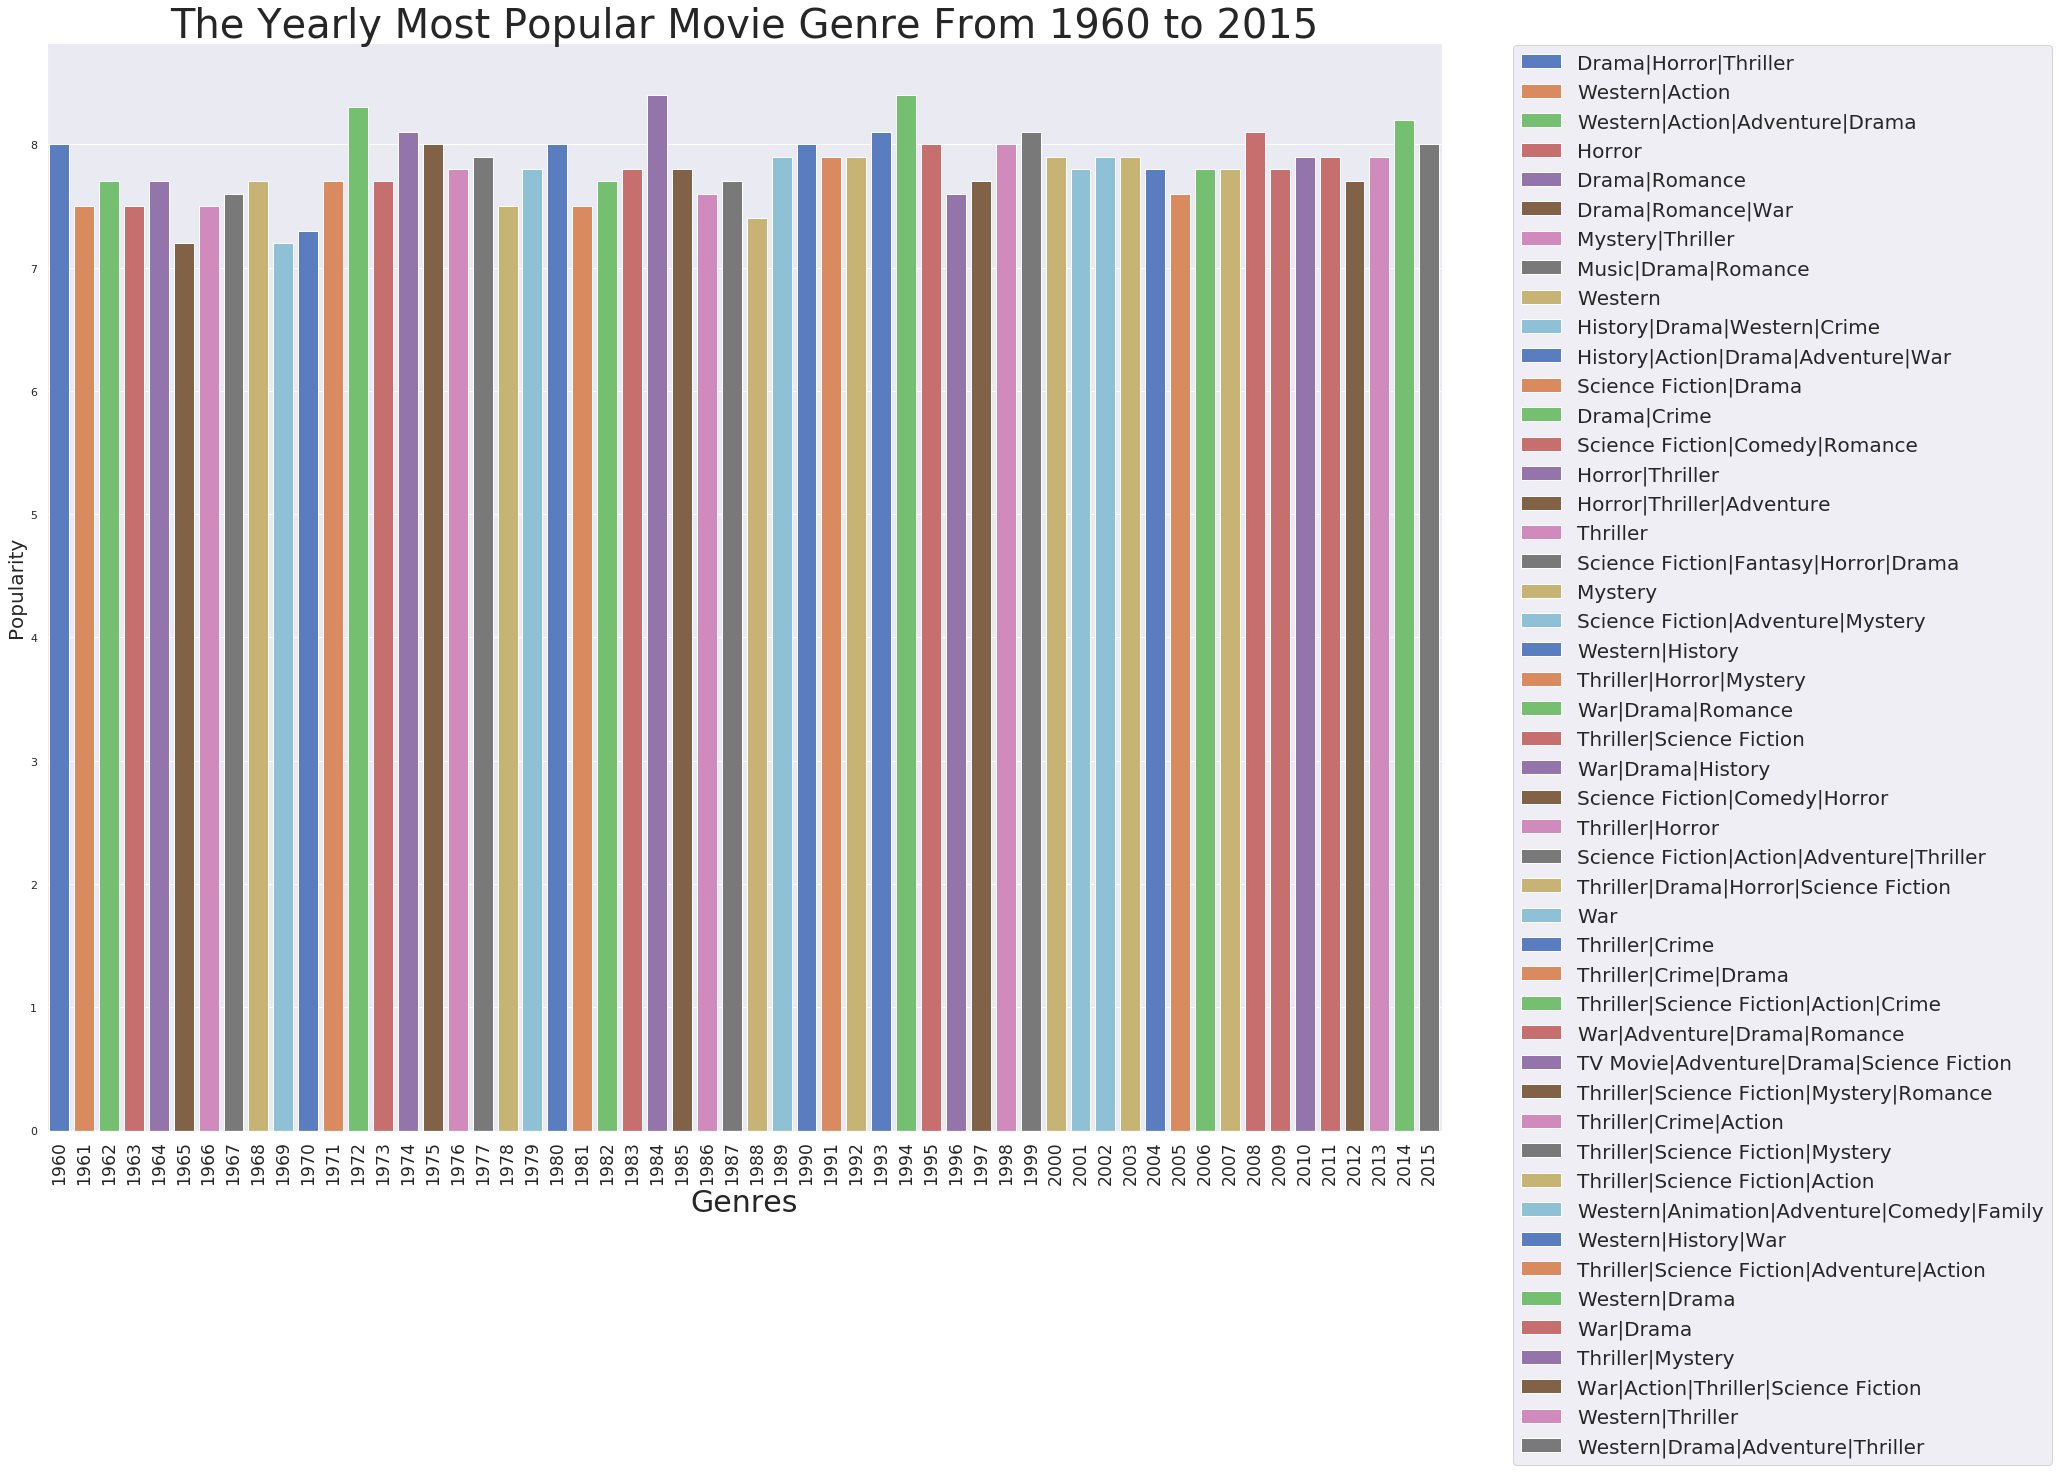

In [17]:
# Get the Most Popular Genre in Each Release Year
popular_genre_per_year = movies_df.groupby(['release_year'])[['vote_average','genres']].max()
plt.subplots(figsize=(25, 20))
graph = sns.barplot(
                    popular_genre_per_year.index,
                    popular_genre_per_year['vote_average'],
                    hue=popular_genre_per_year['genres'],
                    dodge=False,
                    palette='muted',
                   )
graph.set_xticklabels(graph.get_xticklabels(),
                      rotation=90,
                      fontweight='light',fontsize='xx-large'
                     )
graph.axes.set_title("The Yearly Most Popular Movie Genre From 1960 to 2015",fontsize=40)
graph.set_xlabel("Genres",fontsize=30)
graph.set_ylabel("Popularity",fontsize=20);

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.1, prop={'size': 20});


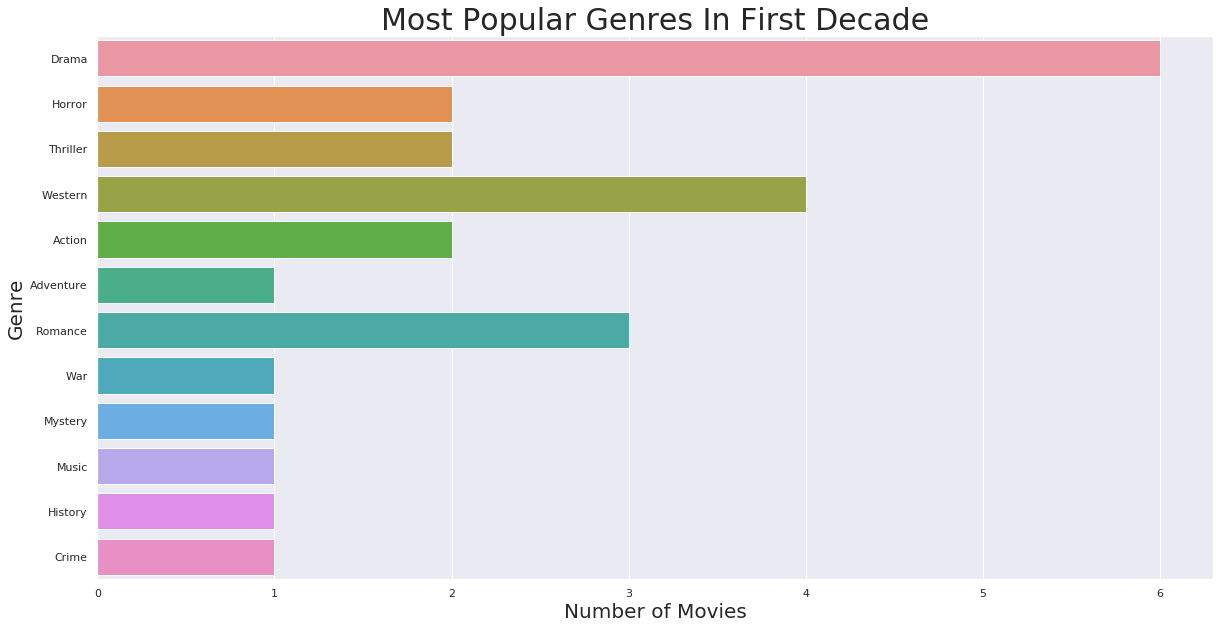

In [18]:
# Find the most popular genre in the first earliest decade
earliest_decade = popular_genre_per_year.head(10)['genres']
earliest_decade_genres = generate_value_and_count(data=earliest_decade)
earliest_decade_genres_df = pd.DataFrame.from_dict(earliest_decade_genres, orient="index")
# Generate the Plot
generate_plot(x_val=earliest_decade_genres_df[0],
              y_val=earliest_decade_genres_df.index,
              fig_size=(20,10),
              title='Most Popular Genres In First Decade',
              x_label='Number of Movies',
              y_label='Genre'
             )

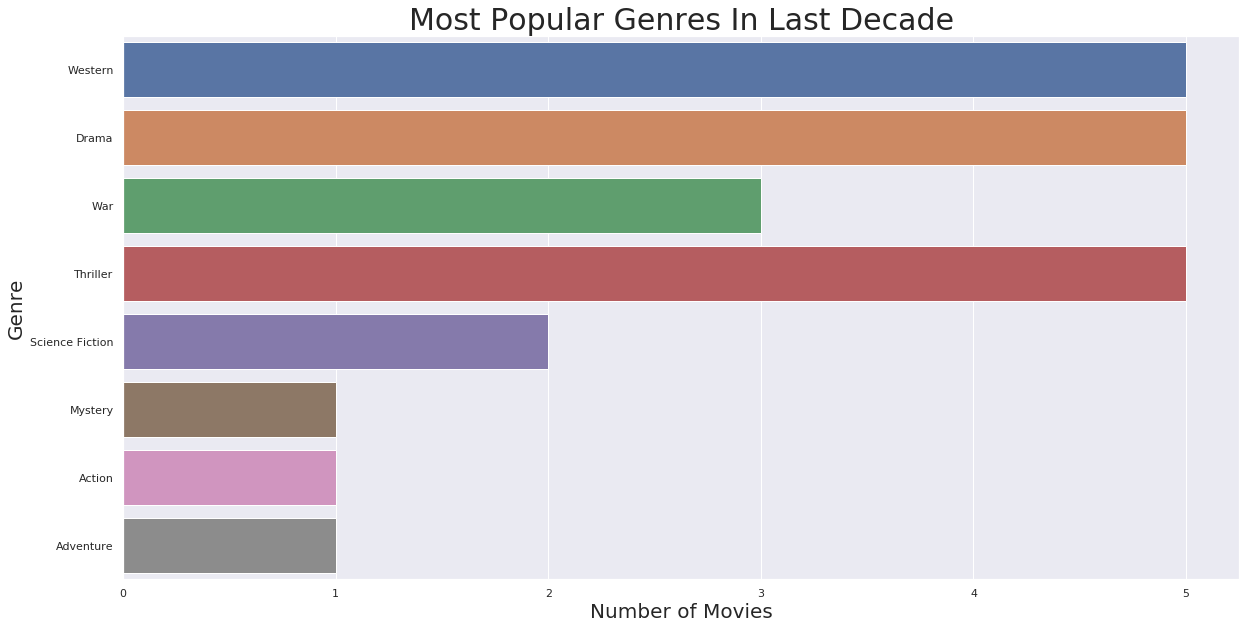

In [19]:
# Find the most popular genre in the most recent decade
recent_decade = popular_genre_per_year.tail(10)['genres']
recent_decade_genres = generate_value_and_count(data=recent_decade)
recent_decade_genres_df = pd.DataFrame.from_dict(recent_decade_genres, orient="index")
# Generate the Plot
generate_plot(x_val=recent_decade_genres_df[0],
              y_val=recent_decade_genres_df.index,
              fig_size=(20,10),
              title='Most Popular Genres In Last Decade',
              x_label='Number of Movies',
              y_label='Genre'
             )

In [20]:
movie_by_genre = movies_df.groupby(['release_year','genres']).mean()[['popularity', 'vote_average']]
movie_by_genre

popularity  vote_average
release_year genres                                                           
1960         Action|Adventure|Western                   1.872132           7.0
             Action|Drama|History                       1.136943           6.9
             Comedy|Drama|Romance                       0.947307           7.9
             Comedy|Romance                             0.055821           7.2
             Drama|Horror|Thriller                      2.610362           8.0
...                                                          ...           ...
2015         Thriller|Drama|Adventure|Action|History    2.345821           6.4
             Thriller|Horror                            0.561306           4.8
             Thriller|Mystery                           1.926739           6.6
             War|Adventure|Science Fiction              5.476958           6.5
             Western|Drama|Adventure|Thriller           9.110700           7.2

[2724 rows x 2 columns]

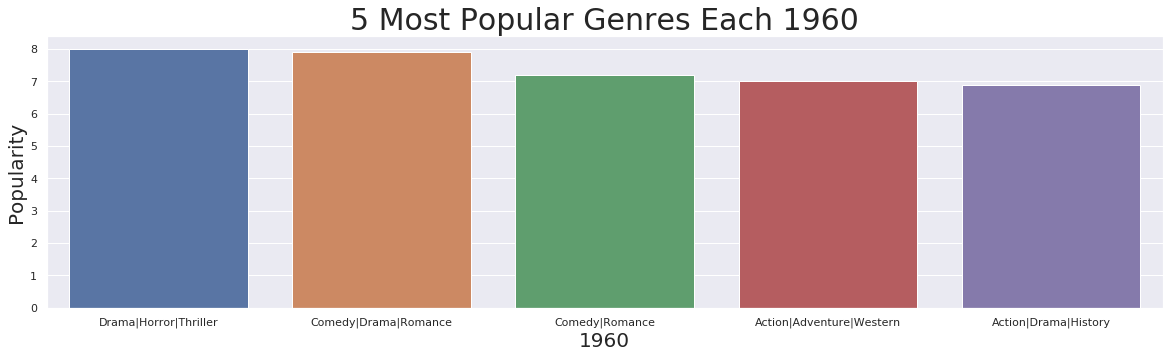

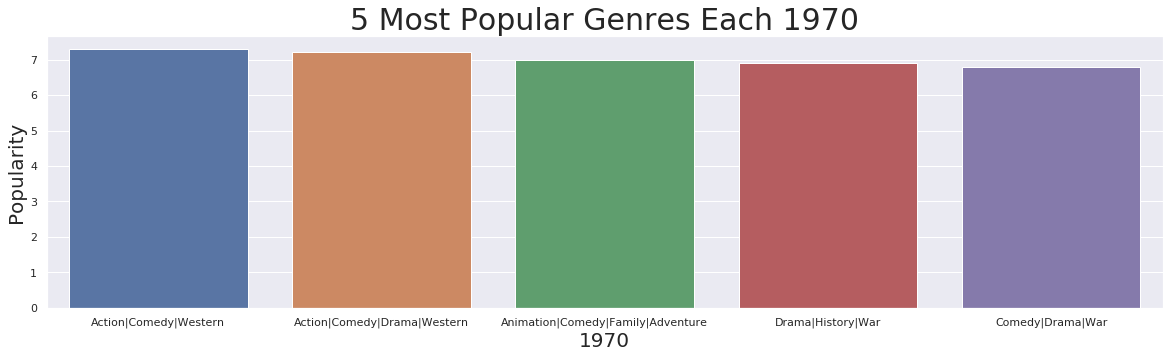

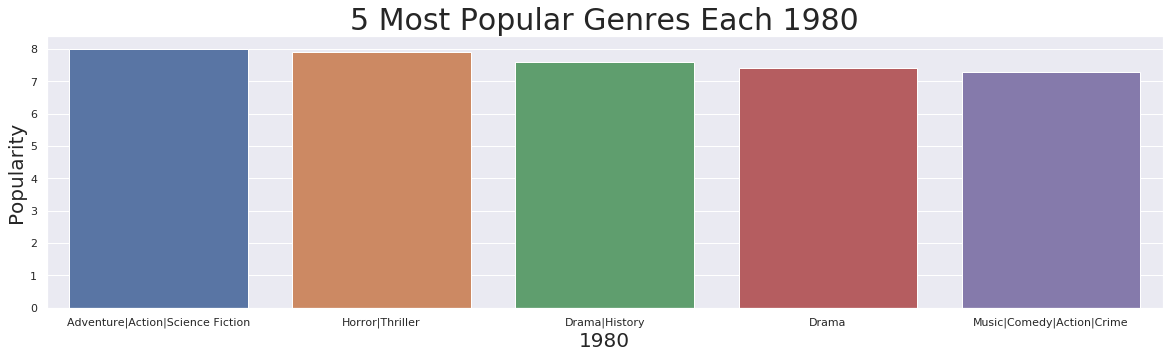

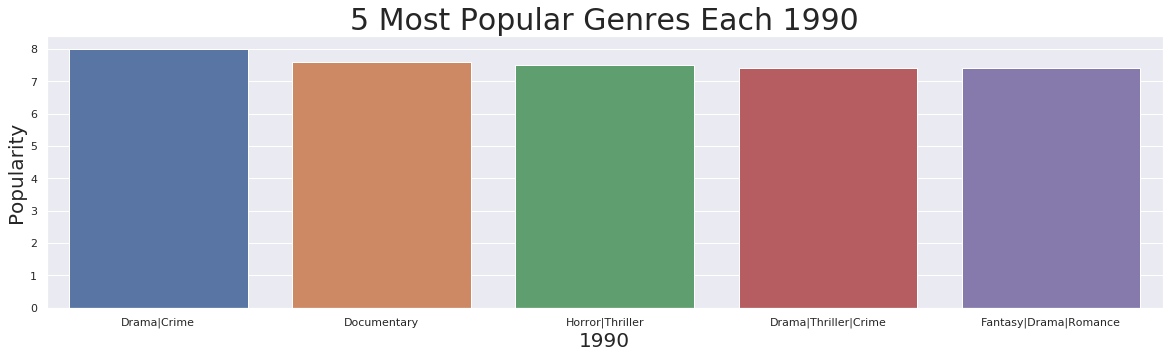

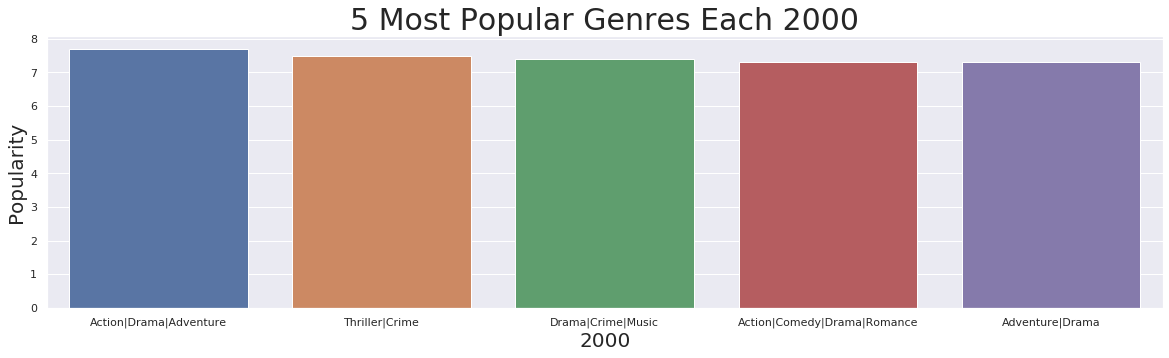

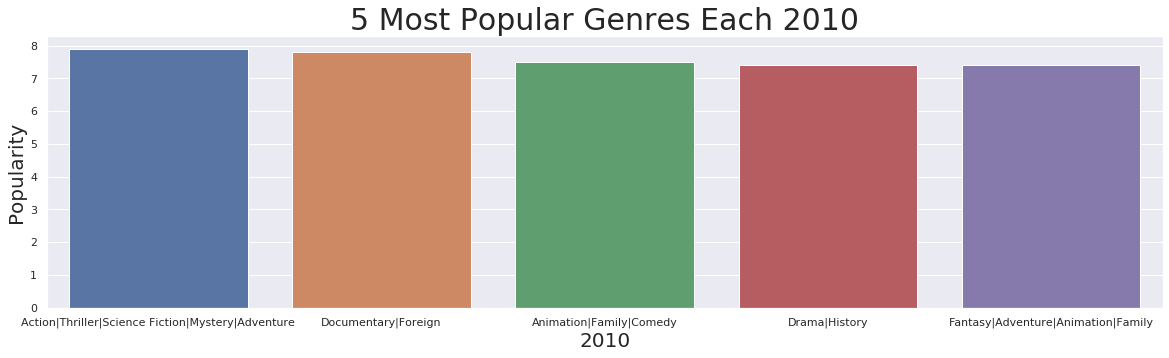

In [21]:
# Group The Genres by Year and Find the Most Popular Ones Based on popularity and vote_average
for year in np.arange(1960,2016, 10): # Interval can be changed if all the years need to appear.
    df = movies_df.query('release_year == @year').groupby('genres').mean().sort_values(by=['vote_average'], ascending=False).head(5)
    plt.subplots(figsize=(20, 5))
    sns.barplot(df.index,df['vote_average'])
    plt.title(f"5 Most Popular Genres Each {year}", fontsize=30)
    plt.ylabel('Popularity', fontsize=20)
    plt.xlabel(year, fontsize=20)

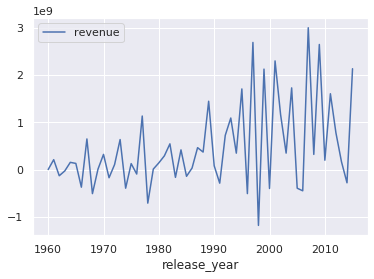

In [22]:
# Find the Sum of the Various Columns According to the Year the Movies Were Released
yearly_movies_sum = movies_df.groupby('release_year').sum()

# Find The Yearly Change in Revenue
yearly_movies_sum.apply(lambda x:x.diff().fillna(0))[['revenue']].plot();

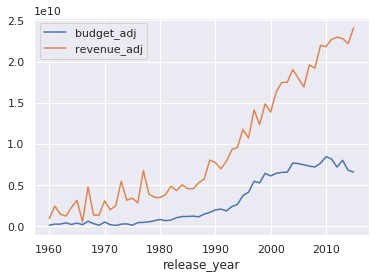

In [23]:
# Compare the Yearly sum for budget_adj and revenue_adj
yearly_movies_sum[['budget_adj', 'revenue_adj']].plot();

In [24]:
pop_ninety_percentile = np.percentile(movies_df['vote_average'], 99)
all_time_popular = movies_df.query('vote_average > @pop_ninety_percentile').sort_values(by=['vote_average'], ascending=False)[['release_year','genres', 'vote_average','original_title']].head(10)

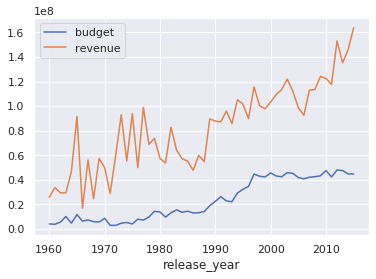

In [25]:
# Budget against Revenue for 1960 to 2015
movies_df.groupby(['release_year'])[[ 'budget','revenue']].mean().plot();

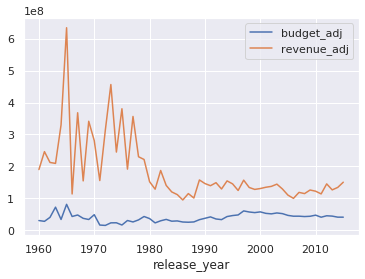

In [26]:
# Budget against Revenue for 1960 to 2015
movies_df.groupby(['release_year'])[[ 'budget_adj','revenue_adj']].mean().plot();

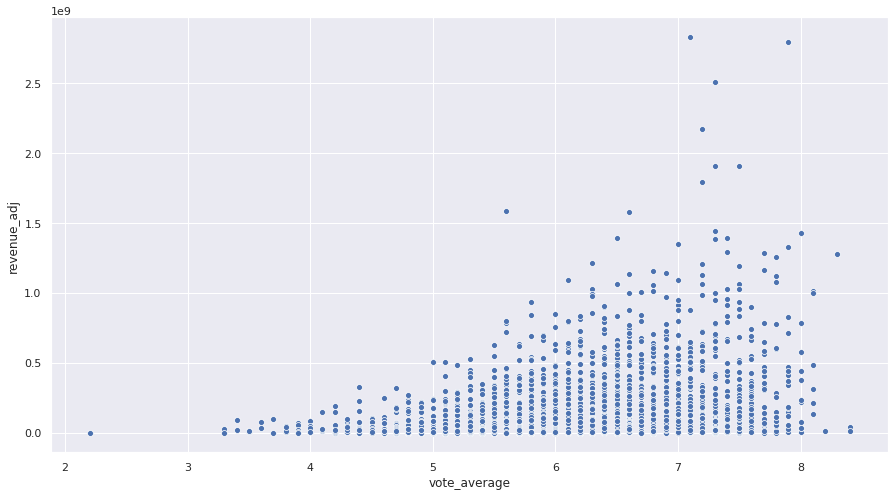

In [27]:
# Compare Revenue and Popularity (vote_average)
revenue_popularity = movies_df[[ 'revenue_adj','vote_average']]
plt.subplots(figsize=(15, 8))
sns.scatterplot(x='vote_average', y='revenue_adj', data=revenue_popularity);

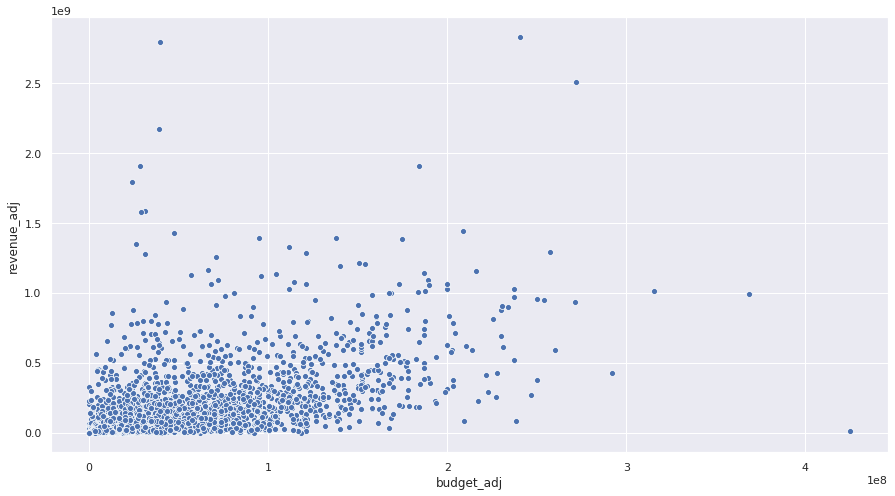

In [28]:
# Compare Revenue and Budget
revenue_budget = movies_df[[ 'revenue_adj','budget_adj']]
plt.subplots(figsize=(15, 8))
sns.scatterplot(x='budget_adj', y='revenue_adj', data=revenue_budget);

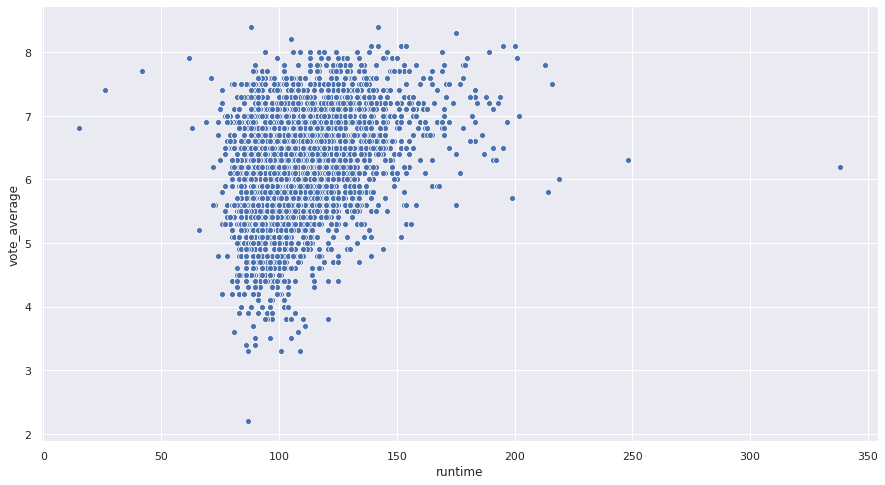

In [29]:
# Compare Popularity(Vote Average) and Runtime
popularity_runtime = movies_df[[ 'vote_average','runtime']]
plt.subplots(figsize=(15, 8))
sns.scatterplot(x='runtime', y='vote_average', data=popularity_runtime);

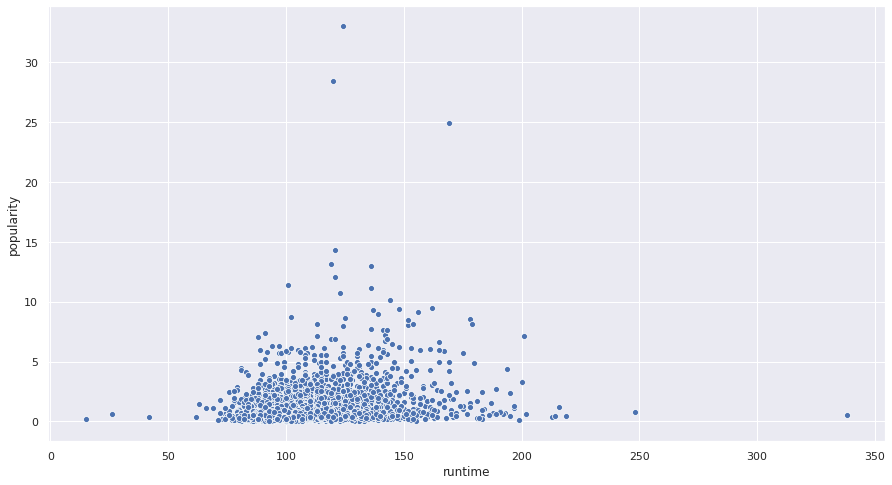

In [30]:
# Popularity-(Popularity) compared to Runtime
popularity_two_runtime = movies_df[[ 'popularity','runtime']]
plt.subplots(figsize=(15, 8))
sns.scatterplot(x='runtime', y='popularity', data=popularity_two_runtime);

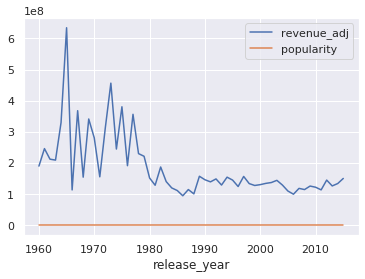

In [31]:
# Popularity Against Revenue
movies_df.groupby(['release_year'])[[ 'revenue_adj','popularity']].mean().plot();

In [32]:
movies_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3854.000000,3854.000000,3.854000e+03,3.854000e+03,3854.000000,3854.000000,3854.000000,3854.000000,3.854000e+03,3.854000e+03
mean,39888.185262,1.191554,3.720370e+07,1.076866e+08,109.220291,527.720291,6.168163,2001.261028,4.423999e+07,1.370647e+08
std,67222.527399,1.475162,4.220822e+07,1.765393e+08,19.922820,879.956821,0.794920,11.282575,4.480925e+07,2.161114e+08
min,5.000000,0.001117,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00
25%,6073.500000,0.462368,1.000000e+07,1.360003e+07,95.000000,71.000000,5.700000,1995.000000,1.309053e+07,1.835735e+07
50%,11321.500000,0.797511,2.400000e+07,4.480000e+07,106.000000,204.000000,6.200000,2004.000000,3.001611e+07,6.173068e+07
75%,38573.250000,1.368324,5.000000e+07,1.242125e+08,119.000000,580.000000,6.700000,2010.000000,6.061307e+07,1.632577e+08
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


In [33]:
# Find how the revenue and runtime of a movie are related
ninety_percentile = np.percentile(movies_df['revenue_adj'], 90)
highest_revenue_movies = movies_df.query('revenue_adj > @ninety_percentile ')

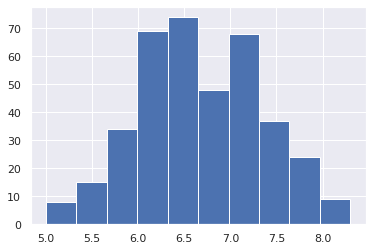

In [34]:
# Check the Budget for of High Revenue Movies
highest_revenue_movies['vote_average'].hist();

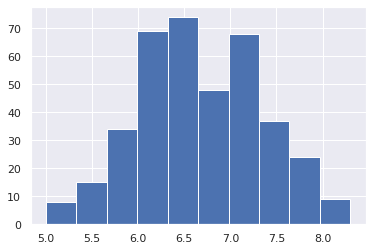

In [35]:
# Check the Vote Average (Popularity Metric) of High Revenue Movies
highest_revenue_movies['vote_average'].hist();

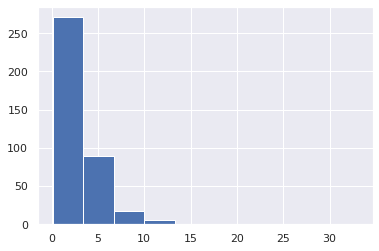

In [36]:
highest_revenue_movies['popularity'].hist();

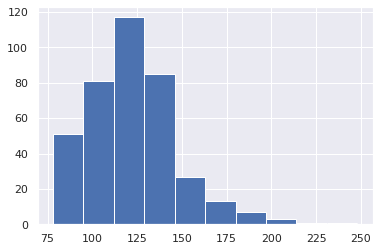

In [37]:
highest_revenue_movies['runtime'].hist();

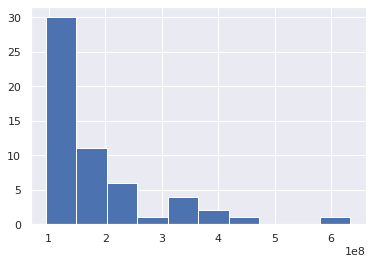

In [38]:
movies_df.groupby('release_year').revenue_adj.mean().hist();

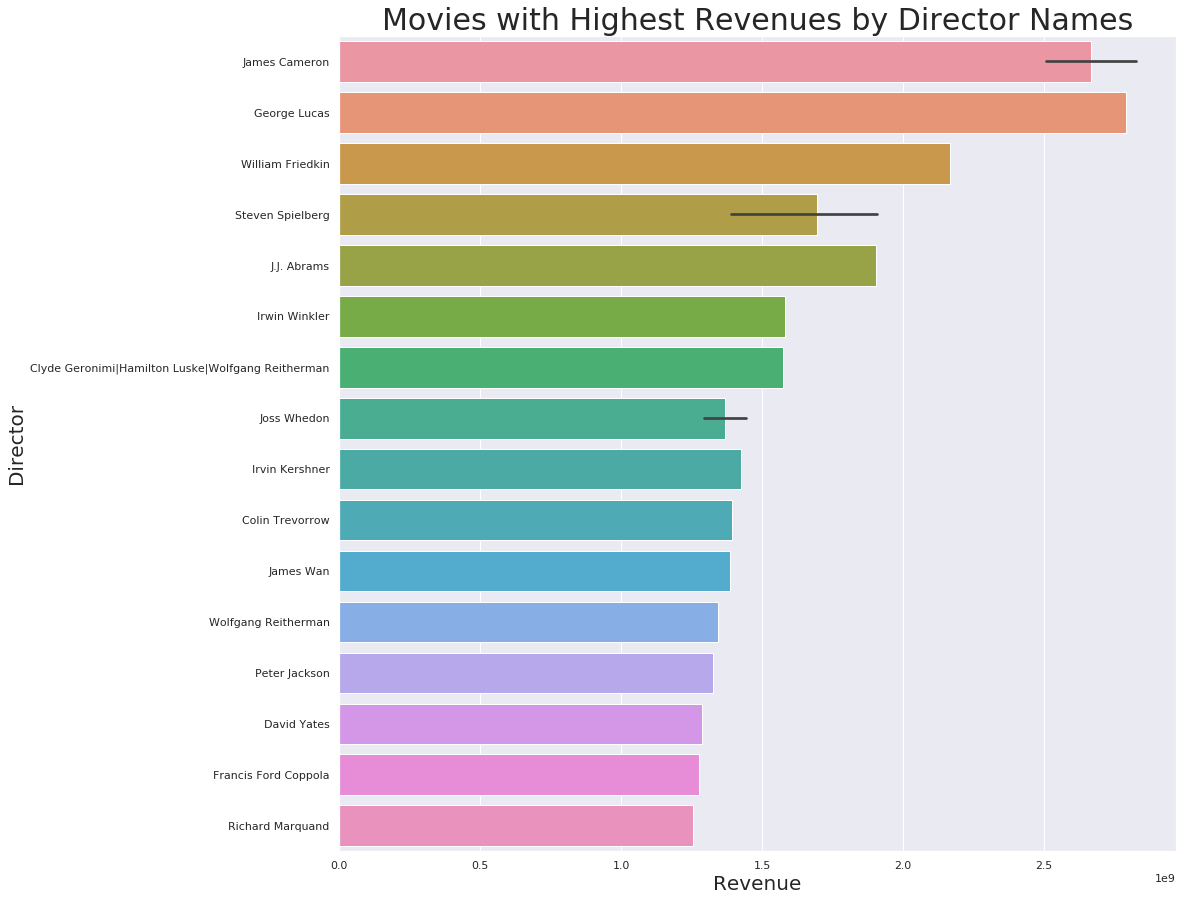

In [39]:
# Find the directors Featured the top 20 movies with highest revenue
top_20_revenue = highest_revenue_movies.sort_values(by=['revenue_adj'], ascending=False).head(20)
plt.subplots(figsize=(15, 15))
sns.barplot(top_20_revenue['revenue_adj'], top_20_revenue['director'])
plt.title('Movies with Highest Revenues by Director Names', fontsize=30)
plt.xlabel('Revenue', fontsize=20)
plt.ylabel('Director', fontsize=20);

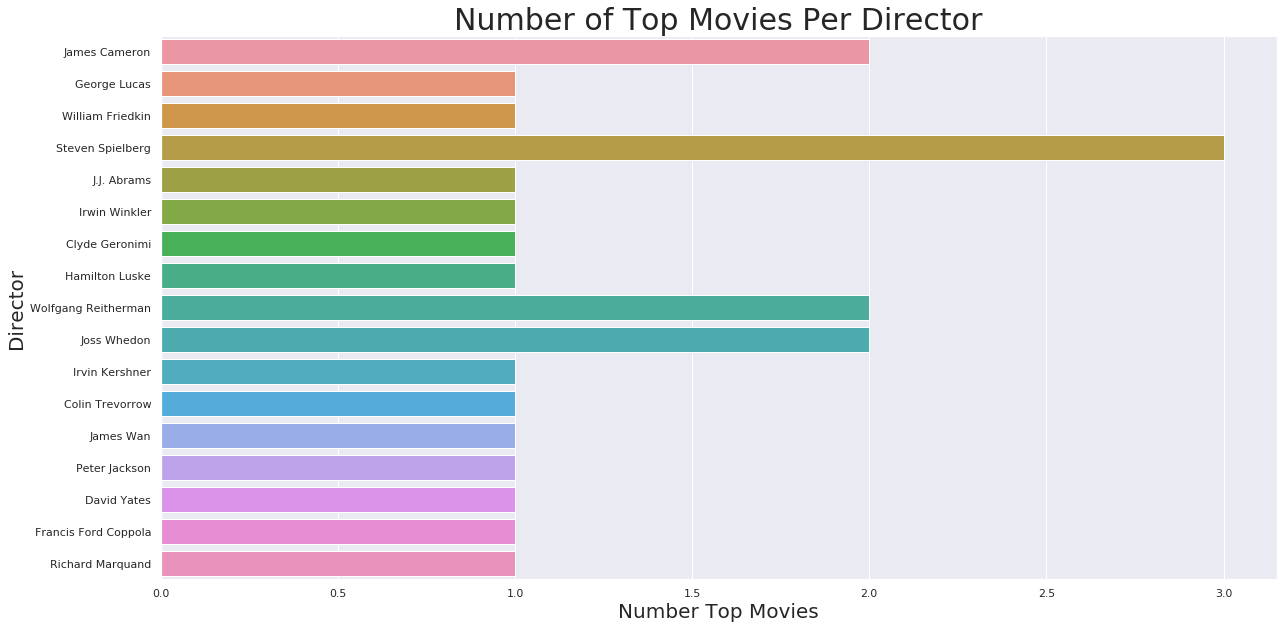

In [47]:
# Find the number of times a particular director made it to the top 20 movies
directors = [director.split('|') for director in top_20_revenue.director]
top_directors = []
for director in directors:
    for single in director:
        top_directors.append(single)


director_counts = dict()
for i in top_directors:
    director_counts[i] = director_counts.get(i, 0)+1

director_count_df = pd.DataFrame.from_dict(director_counts, orient="index")
plt.subplots(figsize=(20, 10))
sns.barplot(director_count_df[0],director_count_df.index)
plt.title('Number of Top Movies Per Director', fontsize=30)
plt.xlabel('Number Top Movies', fontsize=20)
plt.ylabel('Director', fontsize=20);


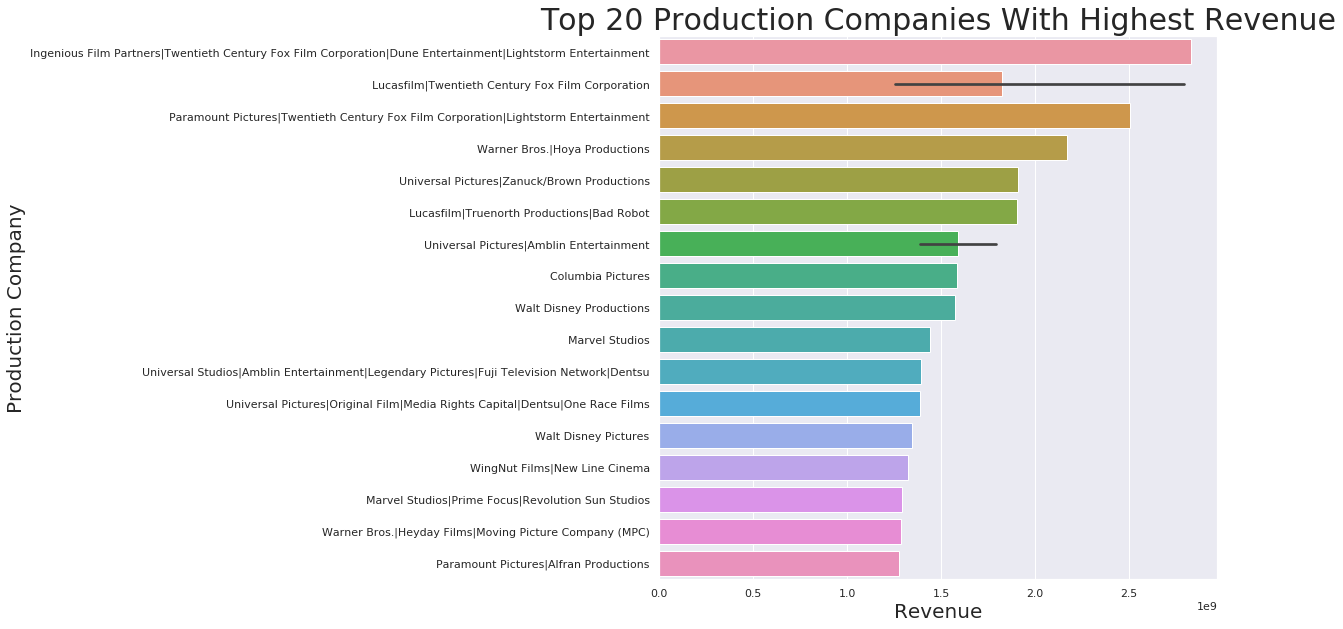

In [41]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.barplot(top_20_revenue['revenue_adj'], top_20_revenue['production_companies'],ax=ax)
plt.title('Top 20 Production Companies With Highest Revenue', fontsize=30)
plt.xlabel('Revenue', fontsize=20)
plt.ylabel('Production Company', fontsize=20);

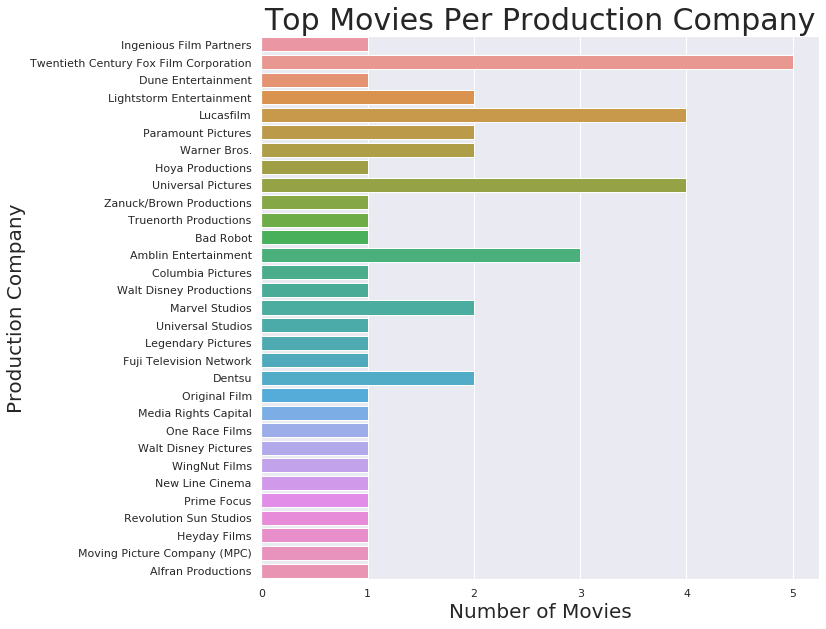

In [42]:
# Find the number of times a particular director made it to the top 20 movies
companies = [company.split('|') for company in top_20_revenue['production_companies']]
top_companies = []
for company in companies:
    for single in company:
        top_companies.append(single)

company_counts = dict()
for i in top_companies:
    company_counts[i] = company_counts.get(i, 0) + 1
company_count_df = pd.DataFrame.from_dict(company_counts, orient="index")

fig, ax = plt.subplots(figsize=(10, 10))
sns.barplot(company_count_df[0], company_count_df.index,ax=ax)
plt.title('Top Movies Per Production Company', fontsize=30)
plt.xlabel('Number of Movies', fontsize=20)
plt.ylabel('Production Company', fontsize=20);

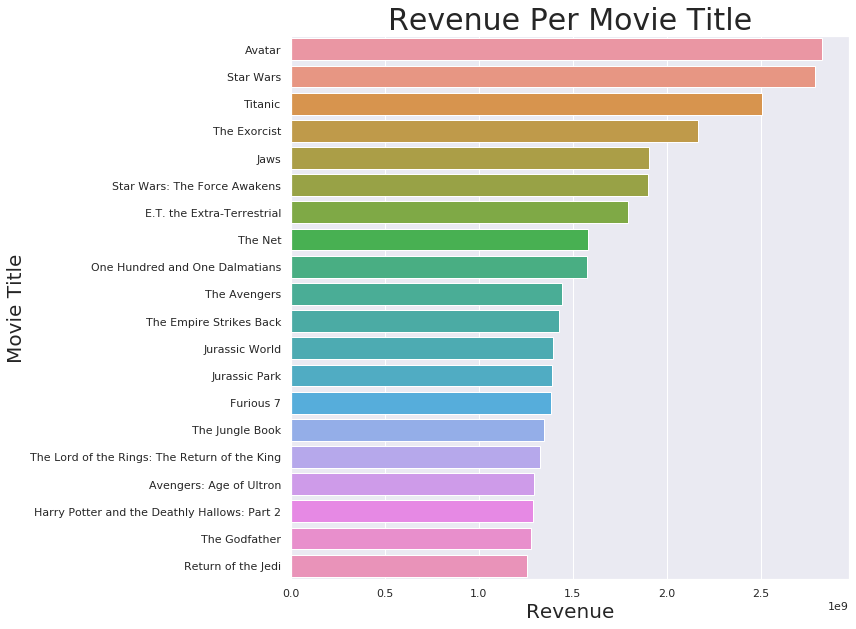

In [43]:
# Find the keywords that are associated with the top revenue movies
fig, ax = plt.subplots(figsize=(10, 10))
sns.barplot(top_20_revenue['revenue_adj'], top_20_revenue['original_title'],ax=ax)
plt.title('Revenue Per Movie Title', fontsize=30)
plt.xlabel('Revenue', fontsize=20)
plt.ylabel('Movie Title', fontsize=20);

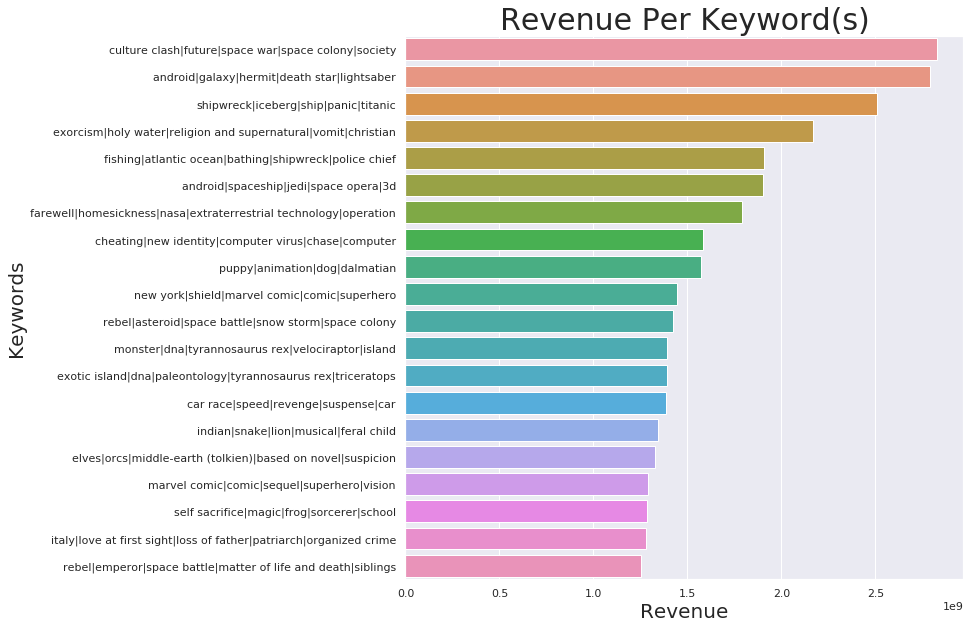

In [44]:
# Find the keywords that are associated with the top revenue movies
fig, ax = plt.subplots(figsize=(10, 10))
sns.barplot(top_20_revenue['revenue_adj'], top_20_revenue['keywords'],ax=ax)
plt.title('Revenue Per Keyword(s)', fontsize=30)
plt.xlabel('Revenue', fontsize=20)
plt.ylabel('Keywords', fontsize=20);

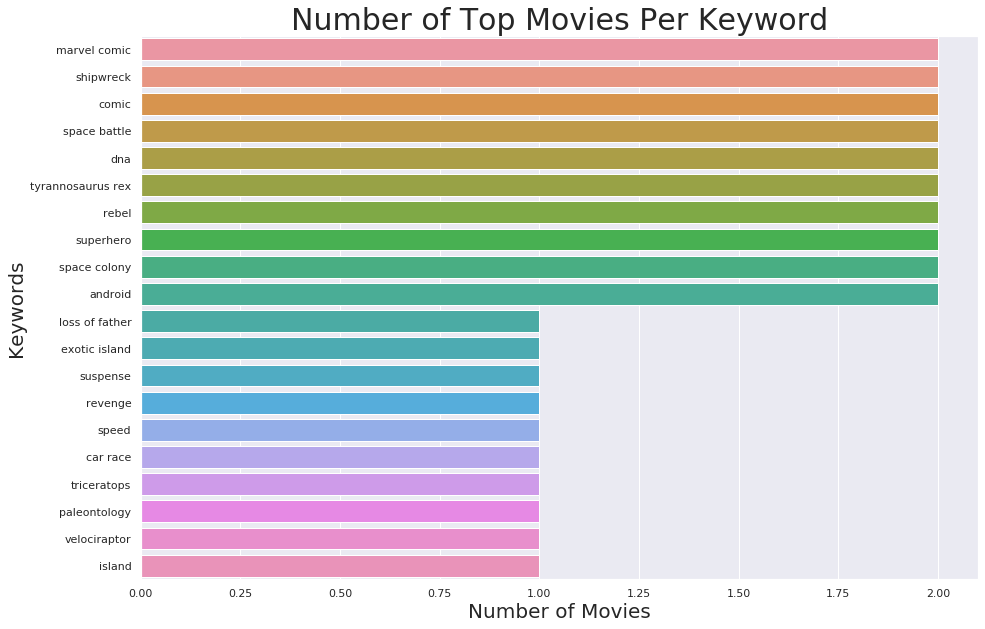

In [45]:
# Find the number of times a particular keyword made it to the top 20 movies
keywords = [keyword.split('|') for keyword in top_20_revenue['keywords']]
top_keywords = []
for keyword in keywords:
    for single in keyword:
        top_keywords.append(single)

keyword_counts = dict()
for i in top_keywords:
    keyword_counts[i] = keyword_counts.get(i, 0) + 1

keyword_count_df = pd.DataFrame.from_dict(keyword_counts, orient="index").sort_values(by=[0], ascending=False).head(20)

fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(keyword_count_df[0], keyword_count_df.index,ax=ax)
plt.title('Number of Top Movies Per Keyword', fontsize=30)
plt.xlabel('Number of Movies', fontsize=20)
plt.ylabel('Keywords', fontsize=20);

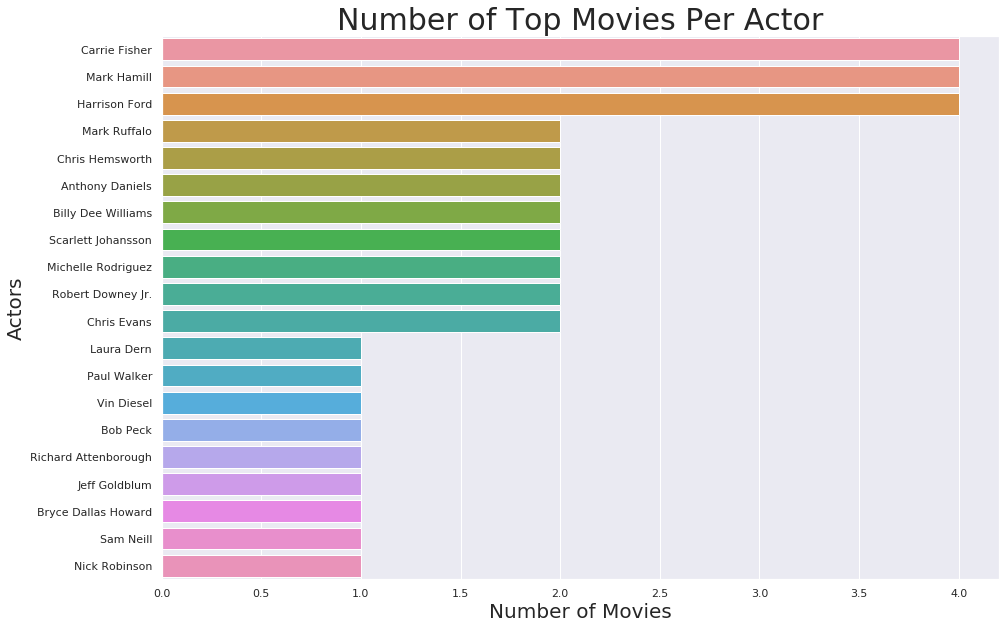

In [46]:
# Find the Actor who is most present in high revenue movies

# Find the number of times a particular keyword made it to the top 20 movies
actors = [actor.split('|') for actor in top_20_revenue['cast']]
top_actors = []
for actor in actors:
    for single in actor:
        top_actors.append(single)

actor_counts = dict()
for i in top_actors:
    actor_counts[i] = actor_counts.get(i, 0) + 1

actor_count_df = pd.DataFrame.from_dict(actor_counts, orient="index").sort_values(by=[0], ascending=False).head(20)

fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(actor_count_df[0],actor_count_df.index, ax=ax)
plt.title('Number of Top Movies Per Actor', fontsize=30)
plt.xlabel('Number of Movies', fontsize=20)
plt.ylabel('Actors', fontsize=20);